In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Need help getting started? Try the cookbook for R:
http://www.cookbook-r.com/Graphs/




In [9]:
plot_dataframe = pd.read_table('./s4-merged_auc.dir/library_auc.txt').query('normalization in ["correlation", "correlation_v2"]').pivot_table(index=['term_name', 'library'], columns='normalization', values='auc').reset_index()
plot_dataframe.head()

normalization                                          term_name  \
0              'de novo' posttranslational protein folding (G...   
1              1-acylglycerol-3-phosphate O-acyltransferase a...   
2              1-phosphatidylinositol 4-kinase activity (GO:0...   
3                    1-phosphatidylinositol binding (GO:0005545)   
4              1-phosphatidylinositol-3-kinase activity (GO:0...   

normalization                     library  correlation  correlation_v2  
0              GO_Biological_Process_2018     0.813400        0.765210  
1              GO_Molecular_Function_2018     0.649188        0.681821  
2              GO_Molecular_Function_2018     0.883242        0.791206  
3              GO_Molecular_Function_2018     0.757972        0.797554  
4              GO_Molecular_Function_2018     0.694560        0.739656

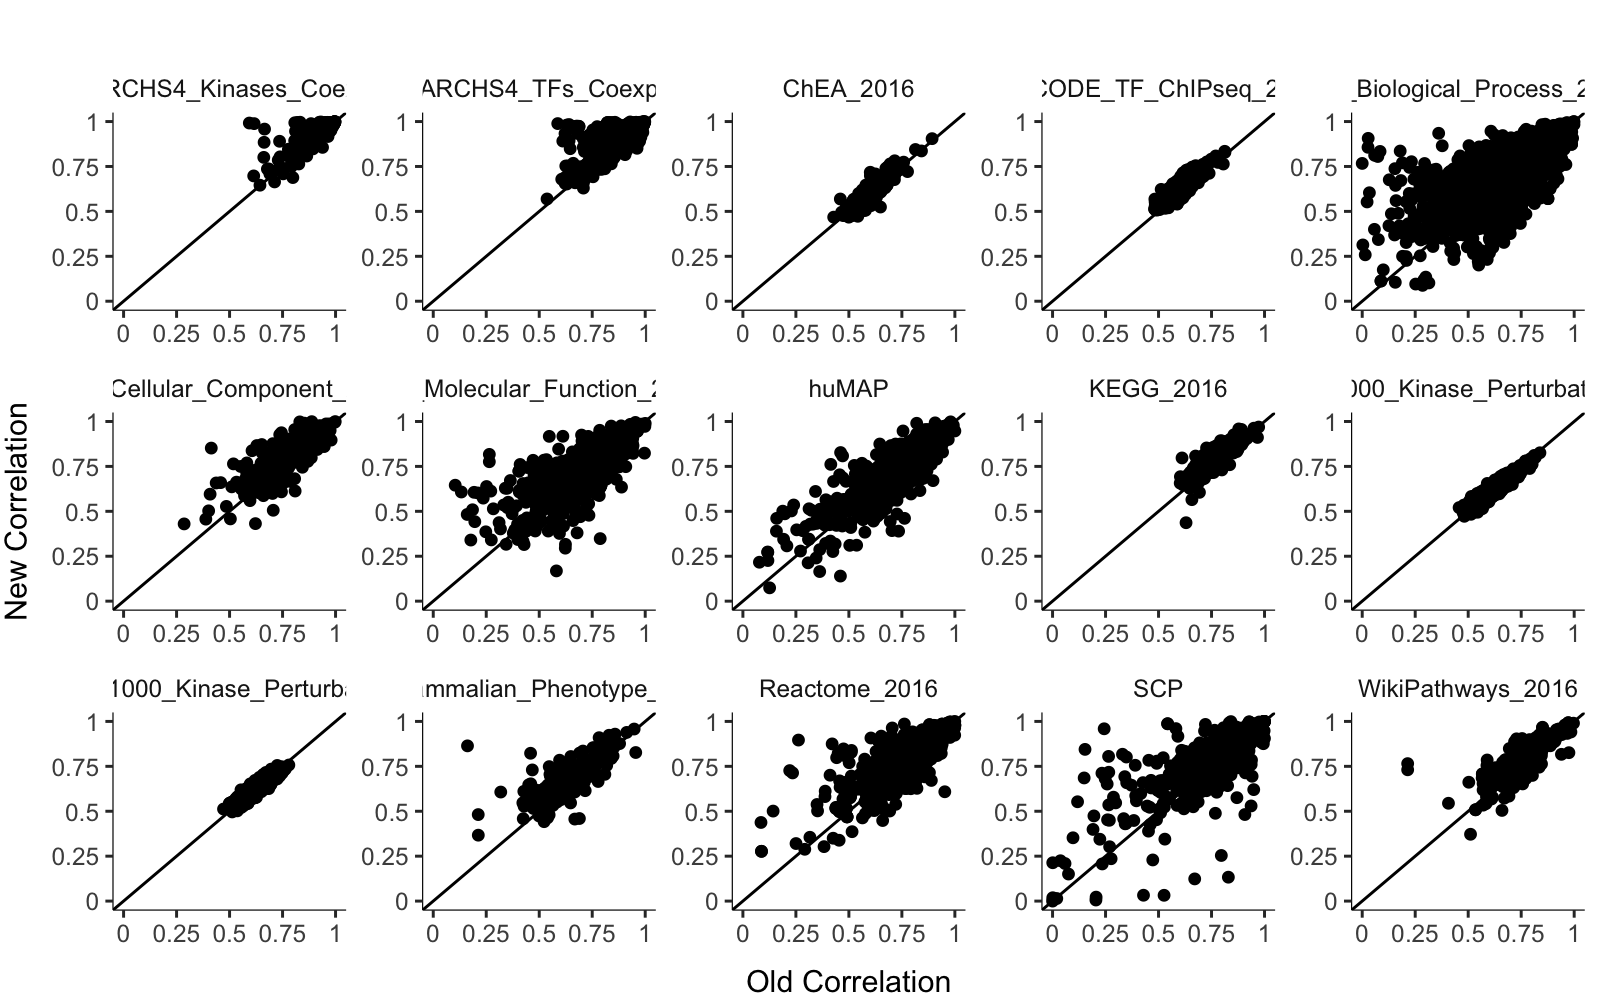

In [11]:
%%R -i plot_dataframe -h 1000 -w 1600 -r 200
ticks <- seq(0, 1, by=0.25)
ggplot(plot_dataframe, aes(x=correlation, y=correlation_v2)) +
geom_point() +
facet_wrap(~library, ncol=5, scales='free') +
#coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks) +
scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks) +
#ggtitle('') +
geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
labs(title = '', x = 'Old Correlation', y = 'New Correlation', color = '', fill='') +
#guides(fill=FALSE) +
theme_classic() +
theme(axis.title.x = element_text(vjust=-1), axis.title.y = element_text(vjust=2.5), axis.line = element_line(colour = 'black', size=0.2), strip.background = element_rect(color='black', fill='white', size=0))

In [13]:
plot_dataframe = pd.read_table('./s4-merged_auc.dir/gene_auc.txt').query('normalization in ["correlation", "correlation_v2"]').pivot_table(index=['gene_symbol', 'library'], columns='normalization', values='auc').reset_index()
plot_dataframe.head()

normalization gene_symbol                                library  correlation  \
0                    A1BG                       ARCHS4_TFs_Coexp     0.835378   
1                    A1BG                              ChEA_2016     0.481173   
2                    A1CF                       ARCHS4_TFs_Coexp     0.965072   
3                    A1CF                              ChEA_2016     0.718988   
4                    A1CF  LINCS_L1000_Kinase_Perturbations_down     0.659640   

normalization  correlation_v2  
0                    0.849445  
1                    0.511930  
2                    0.987338  
3                    0.725537  
4                    0.729171

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



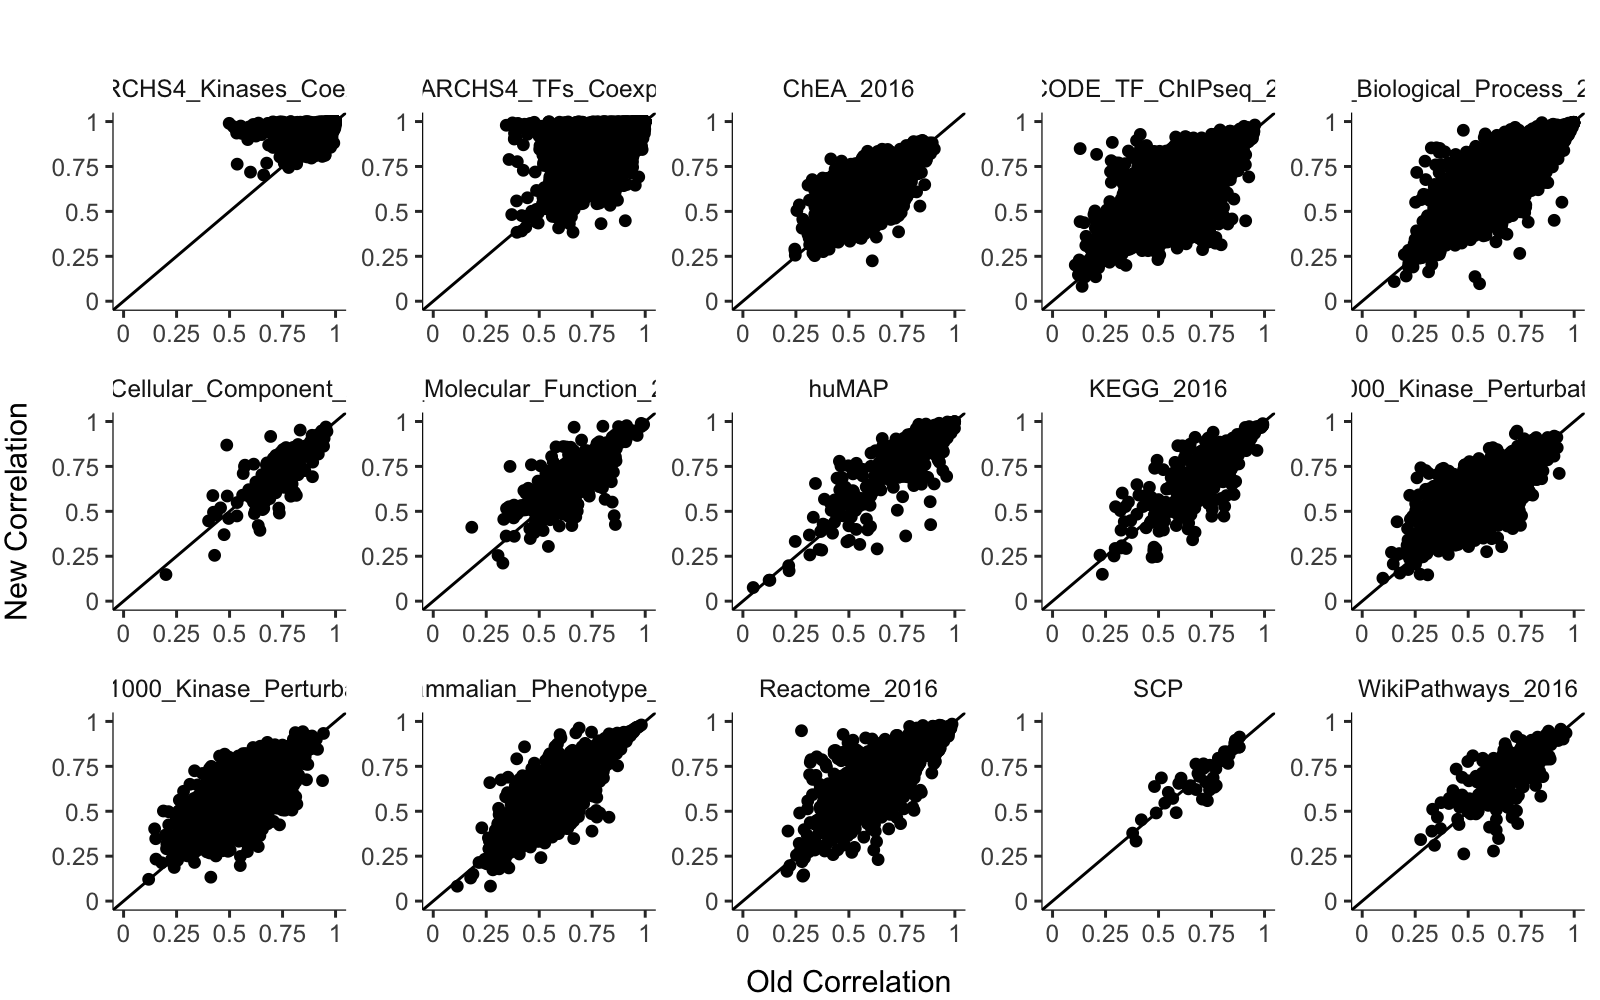

In [14]:
%%R -i plot_dataframe -h 1000 -w 1600 -r 200
ticks <- seq(0, 1, by=0.25)
ggplot(plot_dataframe, aes(x=correlation, y=correlation_v2)) +
geom_point() +
facet_wrap(~library, ncol=5, scales='free') +
#coord_flip() +
#scale_fill_manual(values=c('', '')) +
#scale_fill_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint='1') +
#scale_x_log10() +
#scale_y_log10() +
scale_x_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks) +
scale_y_continuous(lim=c(min(ticks), max(ticks)), breaks=ticks, labels=ticks) +
#ggtitle('') +
geom_abline(intercept=0, slope=1) +
#xlab('') +
#ylab('') +
labs(title = '', x = 'Old Correlation', y = 'New Correlation', color = '', fill='') +
#guides(fill=FALSE) +
theme_classic() +
theme(axis.title.x = element_text(vjust=-1), axis.title.y = element_text(vjust=2.5), axis.line = element_line(colour = 'black', size=0.2), strip.background = element_rect(color='black', fill='white', size=0))